In [1]:
import numpy as np 
import pandas as pd 
import dask.dataframe as dd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

df_jan = dd.read_csv(df_jan_path, assume_missing = True)
df_feb = dd.read_csv(df_feb_path, assume_missing = True)
df_mar = dd.read_csv(df_mar_path, assume_missing = True)

In [3]:
df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


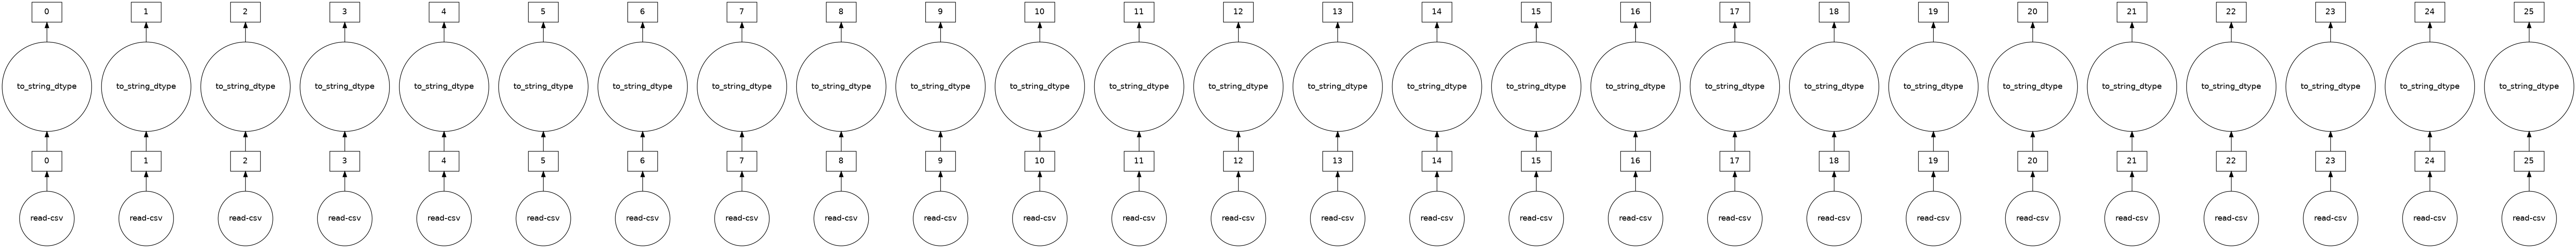

In [4]:
df_jan.visualize(tasks=True)

In [5]:
print("Shape of january dataset", df_jan.shape)
print("Shape of february dataset", df_feb.shape)
print("Shape of march dataset", df_mar.shape)

Shape of january dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(2171d2c)).size() // 19, dtype=int64>, 19)
Shape of february dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(5b0e0bc)).size() // 19, dtype=int64>, 19)
Shape of march dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(f2ac00e)).size() // 19, dtype=int64>, 19)


In [6]:
df_final = dd.concat([df_jan, df_feb, df_mar], axis=0).drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type'])

In [7]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=82,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


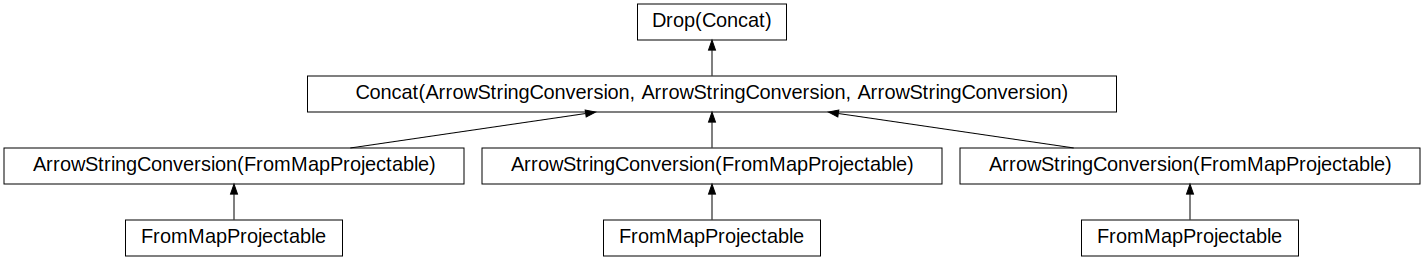

In [8]:
df_final.visualize()

In [9]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [10]:
df_final.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,7.5
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,18.0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,33.0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,16.5
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,8.0
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,19.0
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,26.0
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,9.0
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,18.0
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,11.5


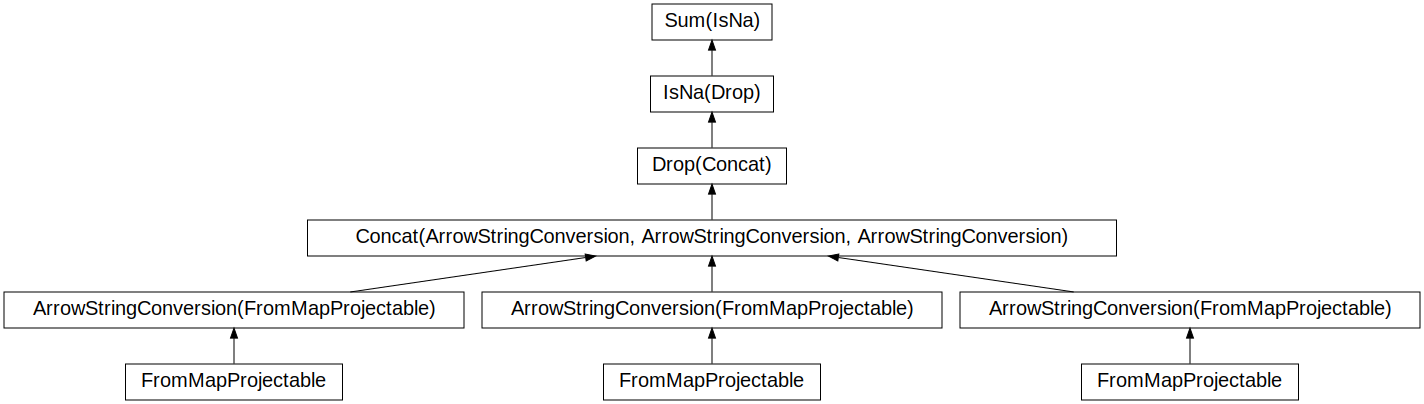

In [11]:
df_final.isna().sum().visualize()

In [12]:
df_final.isna().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [13]:
df_final.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [14]:
sns.set_style("whitegrid")

In [15]:
df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05


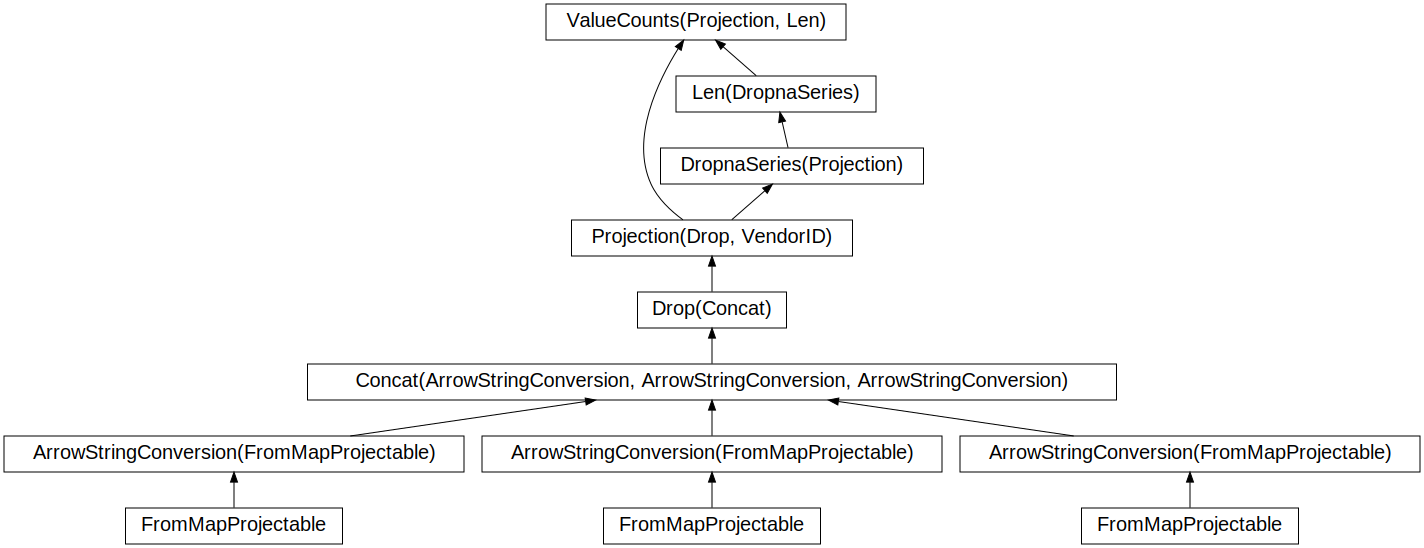

In [16]:
df_final["VendorID"].value_counts(normalize=True).visualize()

In [17]:
vendor_share = (
    df_final["VendorID"]
    .value_counts(normalize=True)
    .compute()
)

In [18]:
type(vendor_share)

pandas.core.series.Series

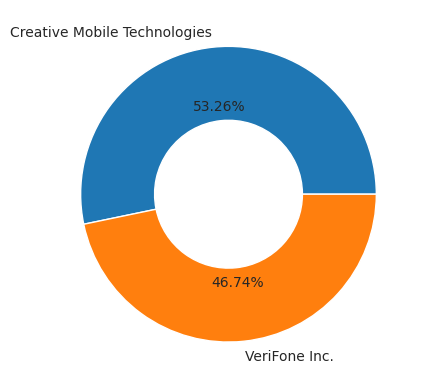

In [19]:
plt.pie(vendor_share, labels=["Creative Mobile Technologies","VeriFone Inc."], autopct="%.2f%%",
       radius=1, wedgeprops=dict(width=0.5, edgecolor="w"))
plt.show()

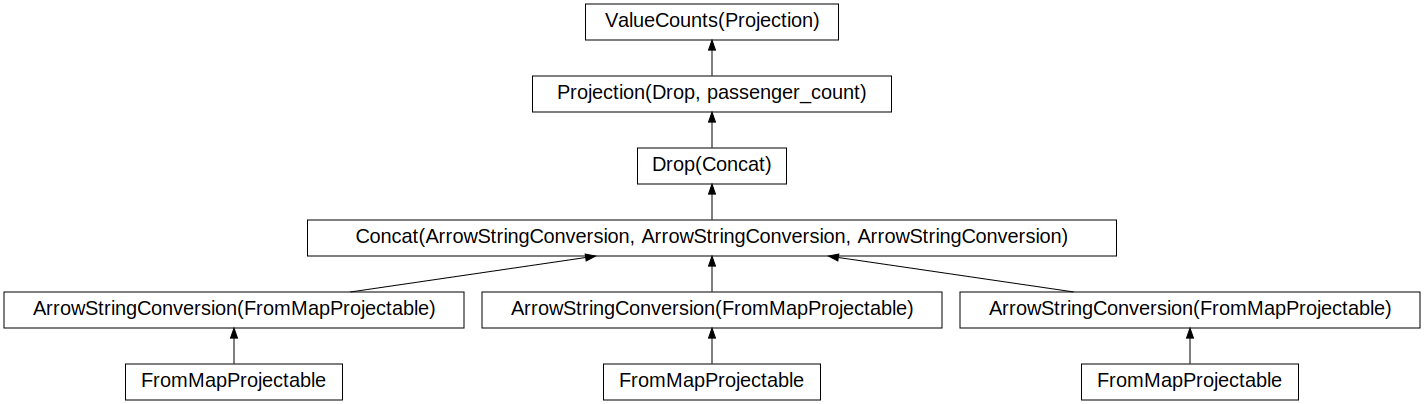

In [20]:
df_final["passenger_count"].value_counts().visualize()

In [21]:
passenger_count = df_final["passenger_count"].value_counts().compute()

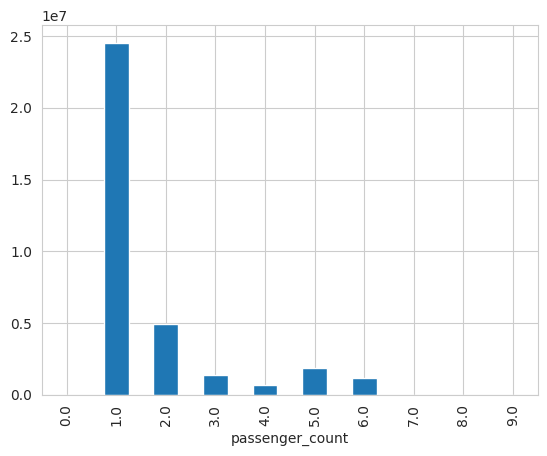

In [22]:
passenger_count.sort_index().plot(kind="bar")
plt.show()

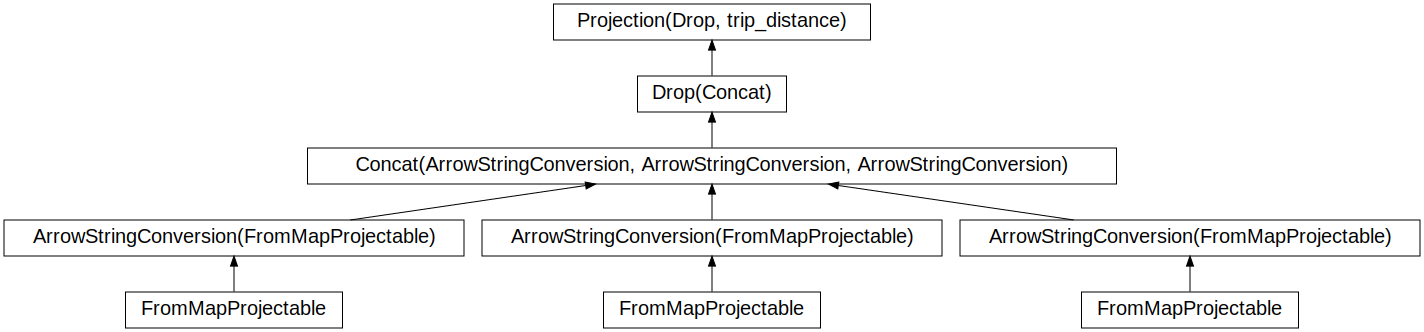

In [23]:
df_final.loc[:,"trip_distance"].visualize()

In [24]:
df_final["trip_distance"]

Dask Series Structure:
npartitions=82
    float64
        ...
     ...   
        ...
        ...
Dask Name: getitem, 9 expressions
Expr=(Drop(frame=Concat(frames=[ArrowStringConversion(frame=FromMapProjectable(2171d2c)), ArrowStringConversion(frame=FromMapProjectable(5b0e0bc)), ArrowStringConversion(frame=FromMapProjectable(f2ac00e))], ), columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type']))['trip_distance']

In [25]:
percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [26]:
percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")


The trip distance value for 10th percentile is 0.7
The trip distance value for 20th percentile is 0.97
The trip distance value for 30th percentile is 1.23
The trip distance value for 40th percentile is 1.56
The trip distance value for 50th percentile is 1.93
The trip distance value for 60th percentile is 2.49
The trip distance value for 70th percentile is 3.27
The trip distance value for 80th percentile is 4.6
The trip distance value for 90th percentile is 8.3


In [27]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [ ]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")


The trip distance value for 90th percentile is 8.3
The trip distance value for 91th percentile is 8.91
The trip distance value for 92th percentile is 9.53
The trip distance value for 93th percentile is 10.2
The trip distance value for 94th percentile is 10.95
The trip distance value for 95th percentile is 12.1
The trip distance value for 96th percentile is 14.680000000000582
The trip distance value for 97th percentile is 16.91
The trip distance value for 98th percentile is 17.95
The trip distance value for 99th percentile is 19.375500000000464
The trip distance value for 100th percentile is 19072628.8


: 

In [ ]:
sns.boxplot(df_final.loc[:,"fare_amount"].compute())

In [ ]:
percentile_values = np.arange(0.1,1.1,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")


In [ ]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")


In [ ]:
rate_code_ids = (
    df_final.loc[:,"RatecodeID"]
    .value_counts()
    .compute()
)

In [ ]:
rate_code_ids.sort_index()

In [ ]:
print(rate_code_ids.sort_index().index.tolist())

In [ ]:
rate_code_ids.sort_index().plot(kind="bar")
plt.show()

In [ ]:
location_subset = df_final[['pickup_latitude','pickup_longitude', 
                           'dropoff_latitude','dropoff_longitude']]

location_subset

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i])
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2])

In [ ]:
sns.countplot(df_final["store_and_fwd_flag"].compute())

In [ ]:
df_final.columns

In [ ]:
df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"], yearfirst=True, format="mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"], yearfirst=True, format="mixed")

In [ ]:
df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour

In [ ]:
df_final

In [ ]:
df_final.columns

In [ ]:
df_final.dtypes

NameError: name 'df_final' is not defined

In [ ]:
df_final.visualize()

In [ ]:
pickups_every_3_days = (
                            df_final
                            .set_index('tpep_pickup_datetime')
                            .resample("3D")
                            .size()
                            .compute()
)

In [ ]:
pickups_every_3_days

In [ ]:
sns.lineplot(pickups_every_3_days)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pickups_each_hour = (
    df_final
    .groupby(["pickup_hour","pickup_day_of_week"])["VendorID"]
    .count()
    .compute()
)

pickups_each_hour

In [ ]:
pickups_each_hour = pickups_each_hour.reset_index()

In [ ]:
pickups_each_hour.rename(columns={"VendorID":"Number of Pickups"},inplace=True)

In [ ]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

replacement_mapper = {k:v for k,v in enumerate(day_names)}

replacement_mapper

In [ ]:
pickups_each_hour.replace({"pickup_day_of_week":replacement_mapper},inplace=True)

In [ ]:
fig = plt.figure(figsize=(12,6))

sns.lineplot(pickups_each_hour, x="pickup_hour", y="Number of Pickups", 
             hue="pickup_day_of_week",hue_order=day_names)

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from dask.distributed import Client
import warnings
warnings.filterwarnings('ignore')

# Set up Dask client for better performance monitoring
client = Client(n_workers=2, threads_per_worker=2, memory_limit='2GB')
print(f"Dask Dashboard: {client.dashboard_link}")

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("NYC TAXI DATA ANALYSIS - EFFICIENT DASK IMPLEMENTATION")
print("="*60)

Dask Dashboard: http://127.0.0.1:34081/status
NYC TAXI DATA ANALYSIS - EFFICIENT DASK IMPLEMENTATION


2025-07-13 15:06:31,172 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle a4c8a6673c73d98aaa8e729a08ec1eb8 initialized by task ('shuffle-transfer-a4c8a6673c73d98aaa8e729a08ec1eb8', 37) executed on worker tcp://127.0.0.1:40527
2025-07-13 15:07:17,179 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle a4c8a6673c73d98aaa8e729a08ec1eb8 deactivated due to stimulus 'task-finished-1752390437.1763787'
2025-07-13 15:07:20,161 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle b082b8cdd5ae218f634a071db51d00fb initialized by task ('shuffle-transfer-b082b8cdd5ae218f634a071db51d00fb', 33) executed on worker tcp://127.0.0.1:40527
2025-07-13 15:08:02,499 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle b082b8cdd5ae218f634a071db51d00fb deactivated due to stimulus 'task-finished-1752390482.4951944'
2025-07-13 15:09:40,069 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 403f0d9a4a4322c31d75ad72d635c027 initialized by task ('shuffle-transfer-403f0d9a4a43

In [28]:
# ==============================================================================
# 1. EFFICIENT DATA LOADING WITH SCHEMA OPTIMIZATION
# ==============================================================================

print("\n1. LOADING DATA WITH OPTIMIZED SCHEMA")
print("-" * 40)

# Define optimal data types to reduce memory usage
dtype_dict = {
    'VendorID': 'int8',
    'passenger_count': 'int8', 
    'trip_distance': 'float32',
    'RatecodeID': 'int8',
    'store_and_fwd_flag': 'category',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'fare_amount': 'float32'
}

# Load data with optimized dtypes and parse dates
df_paths = [
    "../data/raw/yellow_tripdata_2016-01.csv",
    "../data/raw/yellow_tripdata_2016-02.csv", 
    "../data/raw/yellow_tripdata_2016-03.csv"
]

# Load and concatenate efficiently
dfs = []
for i, path in enumerate(df_paths):
    print(f"Loading {path.split('/')[-1]}...")
    df = dd.read_csv(
        path,
        dtype=dtype_dict,
        parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'],
        assume_missing=True,
        blocksize='64MB'  # Optimize block size for better parallelism
    )
    dfs.append(df)

# Efficient concatenation
df_raw = dd.concat(dfs, axis=0)

# Drop unnecessary columns early to reduce memory footprint
columns_to_drop = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                   'improvement_surcharge', 'total_amount', 'payment_type']
df_clean = df_raw.drop(columns=columns_to_drop)

print(f"Dataset shape: {df_clean.shape[0].compute():,} rows x {df_clean.shape[1]} columns")
print(f"Memory usage optimization: {df_clean.memory_usage(deep=True).sum().compute() / 1024**2:.1f} MB")



1. LOADING DATA WITH OPTIMIZED SCHEMA
----------------------------------------
Loading yellow_tripdata_2016-01.csv...
Loading yellow_tripdata_2016-02.csv...
Loading yellow_tripdata_2016-03.csv...
Dataset shape: 34,499,859 rows x 12 columns
Memory usage optimization: 1447.7 MB


In [29]:
# ==============================================================================
# 3. EFFICIENT FEATURE ENGINEERING
# ==============================================================================

print("\n3. FEATURE ENGINEERING")
print("-" * 40)

# Extract time-based features efficiently
df_clean = df_clean.assign(
    pickup_hour=df_clean['tpep_pickup_datetime'].dt.hour,
    pickup_day_of_week=df_clean['tpep_pickup_datetime'].dt.dayofweek,
    pickup_month=df_clean['tpep_pickup_datetime'].dt.month,
    pickup_date=df_clean['tpep_pickup_datetime'].dt.date,
    trip_duration_minutes=(df_clean['tpep_dropoff_datetime'] - 
                          df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
)

# Calculate trip speed (mph) efficiently
df_clean = df_clean.assign(
    trip_speed_mph=df_clean['trip_distance'] / (df_clean['trip_duration_minutes'] / 60)
)

print("New features added: pickup_hour, pickup_day_of_week, pickup_month, trip_duration_minutes, trip_speed_mph")



3. FEATURE ENGINEERING
----------------------------------------
New features added: pickup_hour, pickup_day_of_week, pickup_month, trip_duration_minutes, trip_speed_mph


In [30]:
# ==============================================================================
# 4. SMART SAMPLING FOR VISUALIZATION
# ==============================================================================

print("\n4. CREATING REPRESENTATIVE SAMPLES FOR VISUALIZATION")
print("-" * 40)

# Create stratified sample for detailed analysis (more representative than random)
def create_smart_sample(df, sample_size=100000):
    """Create a representative sample stratified by month and day of week"""
    # Sample proportionally from each month
    sample_parts = []
    for month in [1, 2, 3]:
        month_data = df[df['pickup_month'] == month]
        month_size = int(sample_size / 3)
        month_sample = month_data.sample(frac=month_size/month_data.shape[0].compute(), 
                                       random_state=42)
        sample_parts.append(month_sample)
    
    return dd.concat(sample_parts)

# Create sample for visualization
sample_df = create_smart_sample(df_clean, 50000).compute()
print(f"Sample size for visualization: {len(sample_df):,} rows")



4. CREATING REPRESENTATIVE SAMPLES FOR VISUALIZATION
----------------------------------------
Sample size for visualization: 50,001 rows


In [31]:
# ==============================================================================
# 5. ENHANCED EDA WITH EFFICIENT VISUALIZATIONS
# ==============================================================================

print("\n5. ENHANCED EXPLORATORY DATA ANALYSIS")
print("-" * 40)


5. ENHANCED EXPLORATORY DATA ANALYSIS
----------------------------------------



5.1 Vendor Market Share Analysis


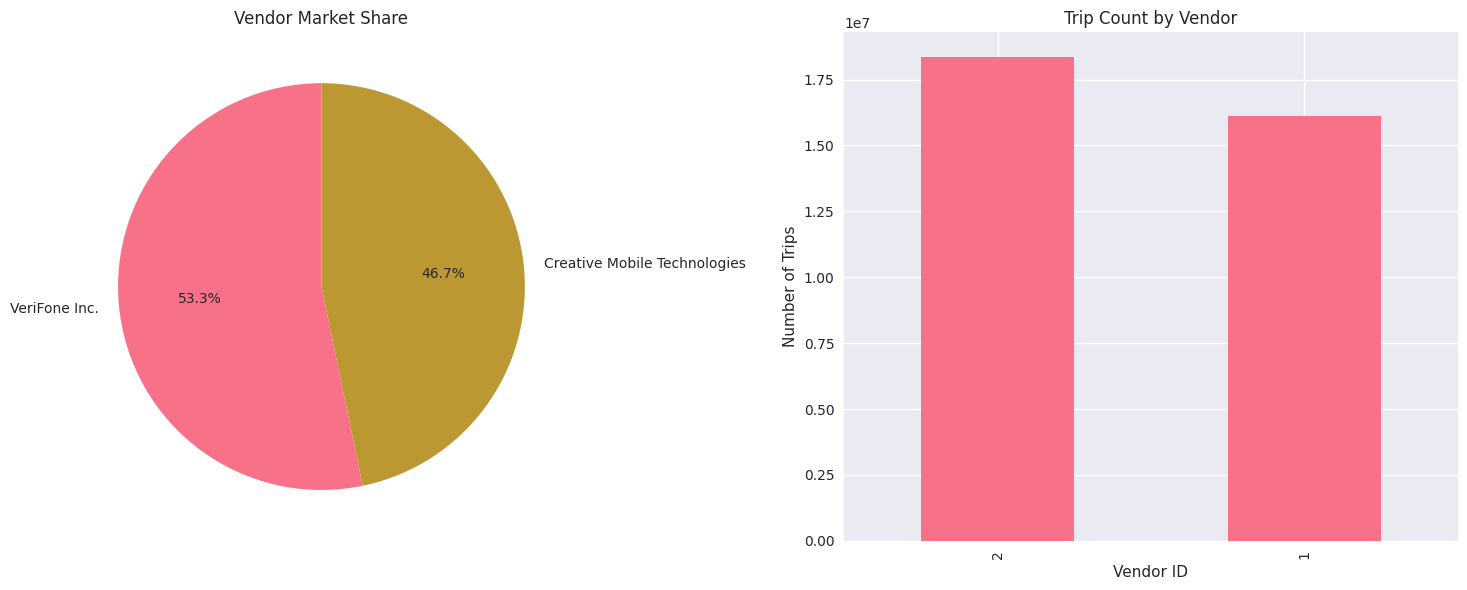

In [32]:
# 5.1 Vendor Analysis
print("\n5.1 Vendor Market Share Analysis")
vendor_counts = df_clean['VendorID'].value_counts().compute()
vendor_names = {1: 'Creative Mobile Technologies', 2: 'VeriFone Inc.'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
ax1.pie(vendor_counts.values, labels=[vendor_names[i] for i in vendor_counts.index], 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('Vendor Market Share')

# Bar chart
vendor_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Trip Count by Vendor')
ax2.set_xlabel('Vendor ID')
ax2.set_ylabel('Number of Trips')
plt.tight_layout()
plt.show()


5.2 Temporal Pattern Analysis


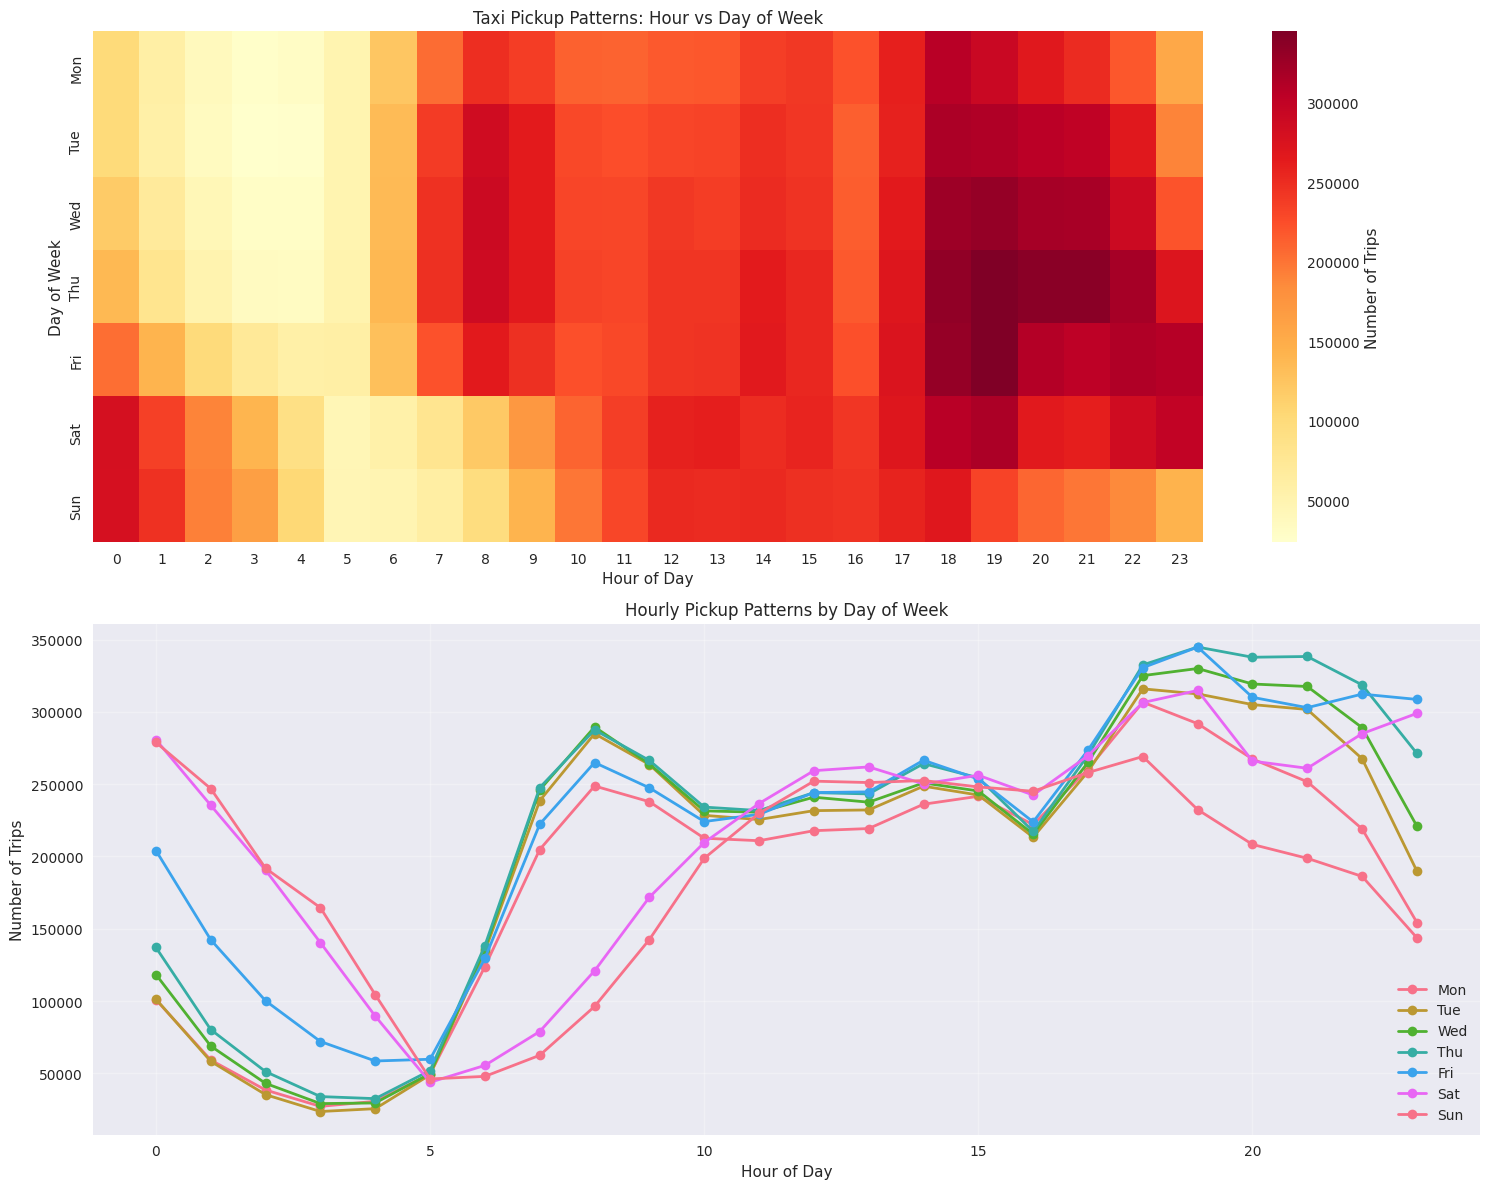

In [33]:
# 5.2 Temporal Analysis
print("\n5.2 Temporal Pattern Analysis")

# Hourly patterns by day of week (using aggregated data, not sample)
hourly_patterns = (df_clean
                  .groupby(['pickup_hour', 'pickup_day_of_week'])
                  .size()
                  .reset_index()
                  .rename(columns={0: 'trip_count'})
                  .compute())

# Add day names
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hourly_patterns['day_name'] = hourly_patterns['pickup_day_of_week'].map(
    {i: day_names[i] for i in range(7)}
)

# Create heatmap
pivot_data = hourly_patterns.pivot(index='pickup_hour', columns='day_name', values='trip_count')
pivot_data = pivot_data.reindex(columns=day_names)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Heatmap
sns.heatmap(pivot_data.T, annot=False, cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Number of Trips'})
ax1.set_title('Taxi Pickup Patterns: Hour vs Day of Week')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Day of Week')

# Line plot for better trend visibility
for day in day_names:
    day_data = pivot_data[day]
    ax2.plot(day_data.index, day_data.values, marker='o', label=day, linewidth=2)
ax2.set_title('Hourly Pickup Patterns by Day of Week')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Number of Trips')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


5.3 Trip Distance Analysis
Trip Distance Percentiles:
  10th percentile: 0.70 miles
  25th percentile: 1.10 miles
  50th percentile: 1.93 miles
  75th percentile: 3.80 miles
  90th percentile: 8.20 miles
  95th percentile: 12.10 miles
  99th percentile: 19.38 miles


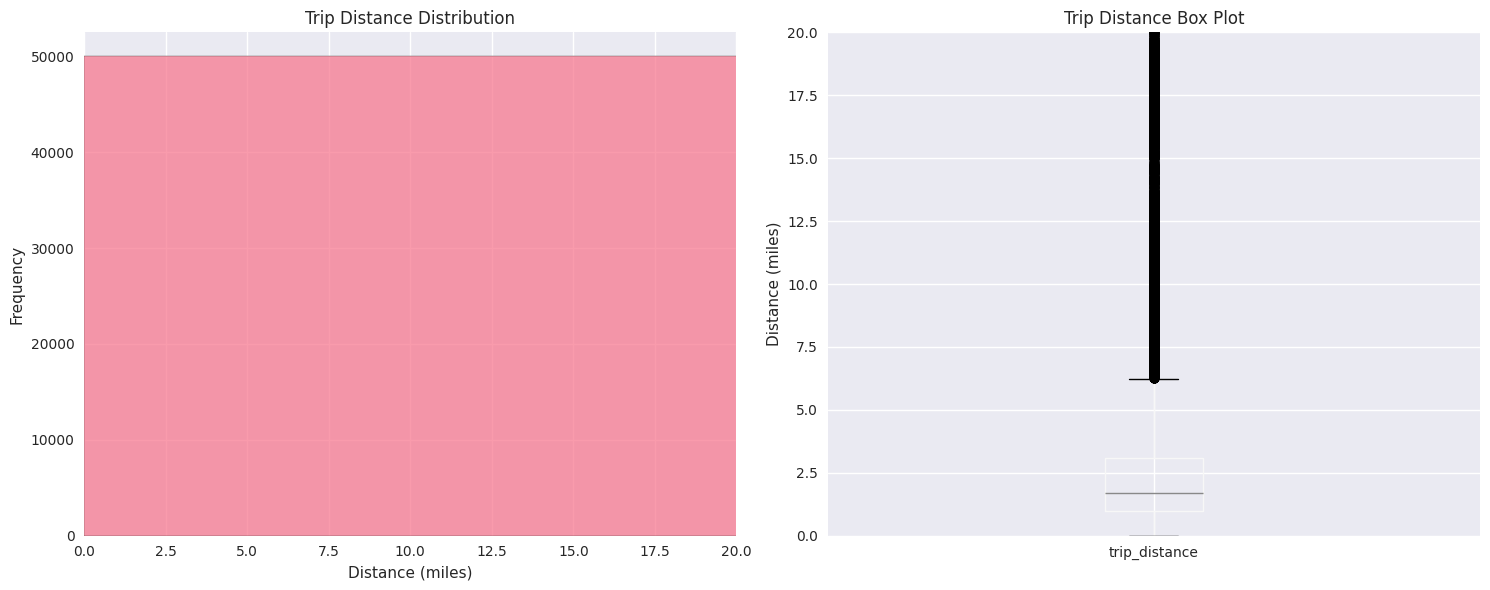

In [34]:
# 5.3 Trip Distance Analysis (using efficient quantiles)
print("\n5.3 Trip Distance Analysis")

# Calculate percentiles efficiently
distance_percentiles = df_clean['trip_distance'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).compute()
print("Trip Distance Percentiles:")
for p, val in distance_percentiles.items():
    print(f"{p*100:4.0f}th percentile: {val:.2f} miles")

# Visualize distribution using sample
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sample_df['trip_distance'].hist(bins=50, ax=ax1, alpha=0.7, edgecolor='black')
ax1.set_title('Trip Distance Distribution')
ax1.set_xlabel('Distance (miles)')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 20)  # Focus on reasonable range

# Box plot using sample (much more efficient)
sample_df.boxplot(column='trip_distance', ax=ax2)
ax2.set_title('Trip Distance Box Plot')
ax2.set_ylabel('Distance (miles)')
ax2.set_ylim(0, 20)

plt.tight_layout()
plt.show()


5.4 Fare Amount Analysis
Fare Amount Statistics:
count    3.449986e+07
mean     1.257198e+01
std      9.179006e+01
min     -9.576000e+02
25%      7.000000e+00
50%      1.000000e+01
75%      1.550000e+01
max      4.294967e+05
Name: fare_amount, dtype: float64


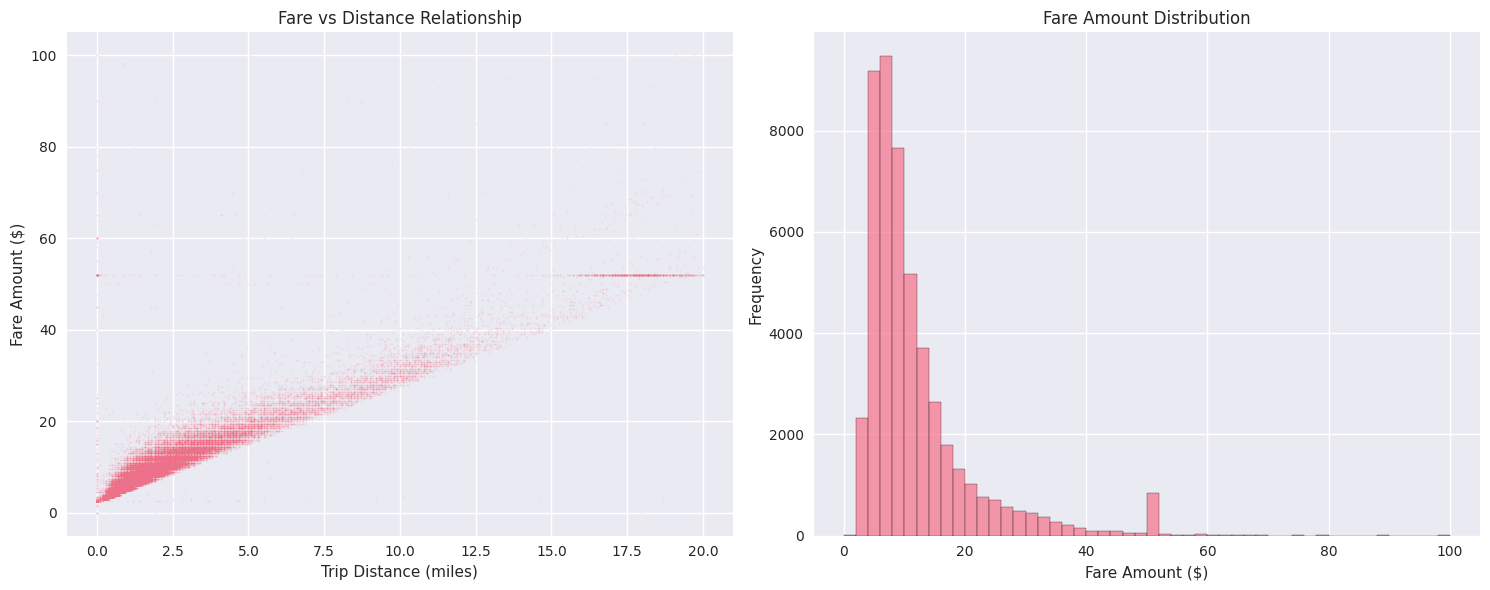

In [35]:
# 5.4 Fare Analysis
print("\n5.4 Fare Amount Analysis")

# Efficient fare analysis
fare_stats = df_clean['fare_amount'].describe().compute()
print("Fare Amount Statistics:")
print(fare_stats)

# Fare vs Distance analysis using sample
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with reasonable limits
reasonable_sample = sample_df[
    (sample_df['trip_distance'] <= 20) & 
    (sample_df['fare_amount'] <= 100) &
    (sample_df['fare_amount'] > 0)
]

ax1.scatter(reasonable_sample['trip_distance'], reasonable_sample['fare_amount'], 
           alpha=0.1, s=1)
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Fare Amount ($)')
ax1.set_title('Fare vs Distance Relationship')

# Fare distribution
reasonable_sample['fare_amount'].hist(bins=50, ax=ax2, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Fare Amount ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('Fare Amount Distribution')

plt.tight_layout()
plt.show()



5.5 Geographic Analysis
Valid NYC coordinates: 49,174 trips


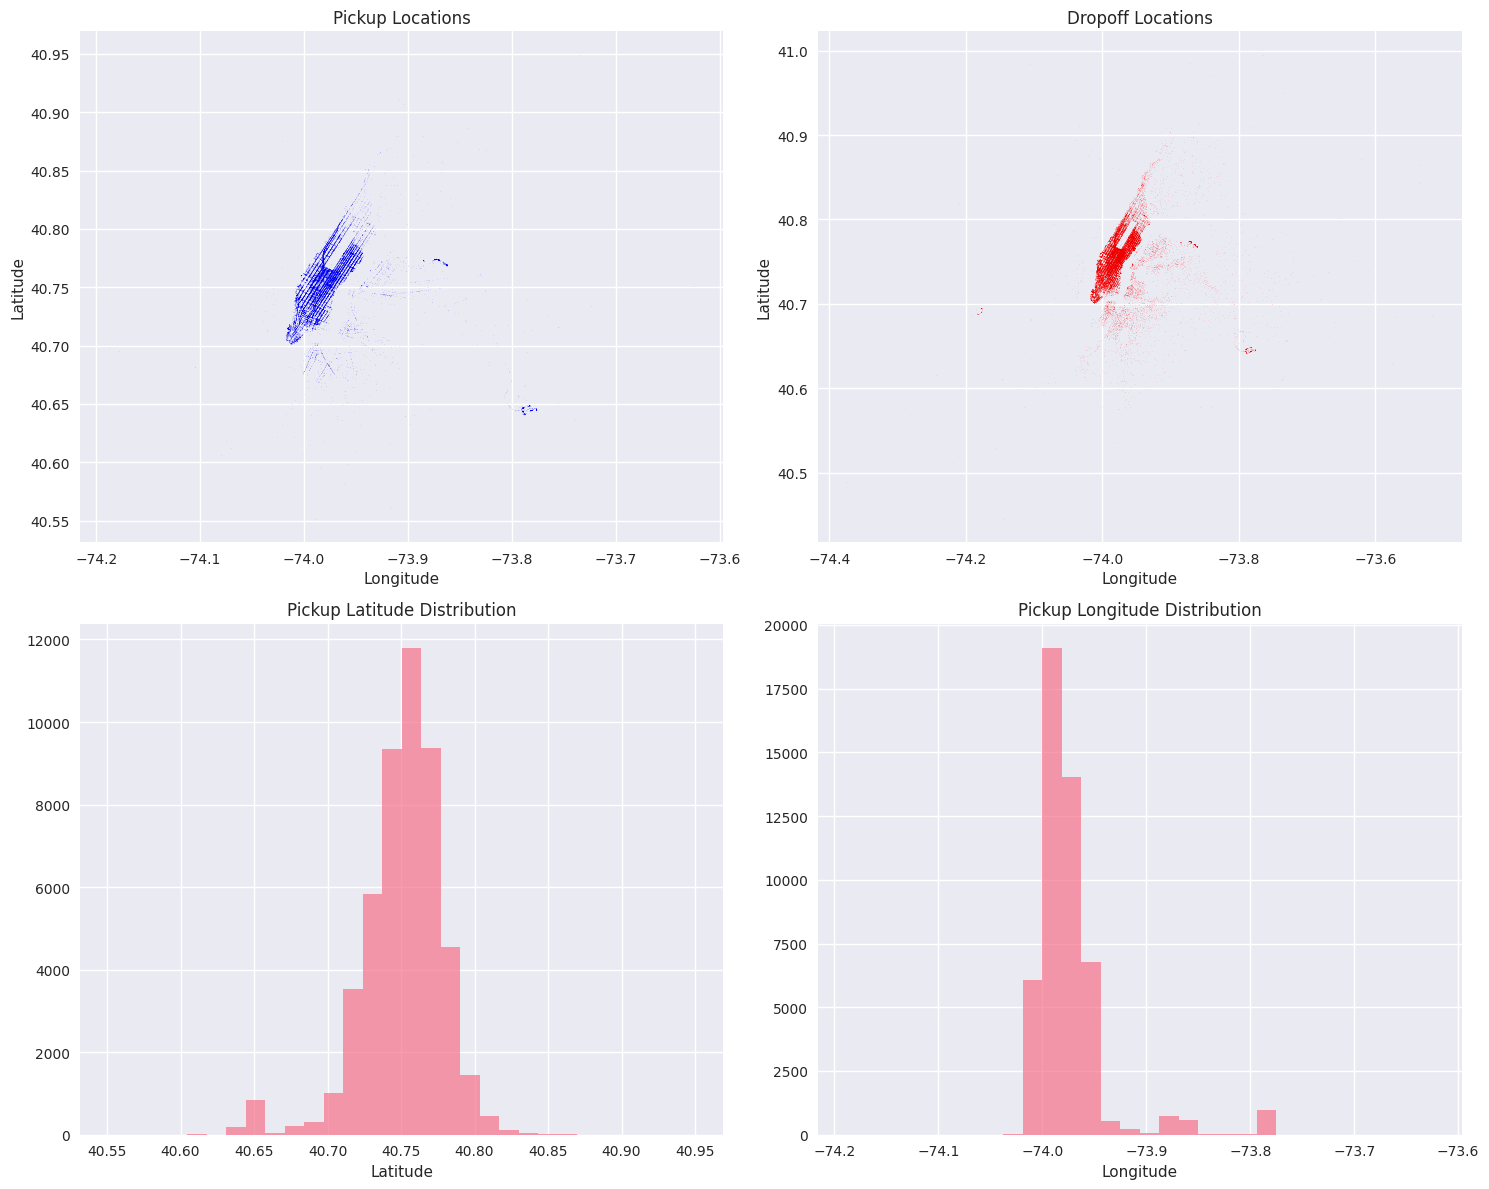

In [36]:
# 5.5 Geographic Analysis (using efficient sampling)
print("\n5.5 Geographic Analysis")

# Filter for reasonable NYC coordinates
nyc_sample = sample_df[
    (sample_df['pickup_latitude'].between(40.4, 41.0)) &
    (sample_df['pickup_longitude'].between(-74.5, -73.5)) &
    (sample_df['dropoff_latitude'].between(40.4, 41.0)) &
    (sample_df['dropoff_longitude'].between(-74.5, -73.5))
]

print(f"Valid NYC coordinates: {len(nyc_sample):,} trips")

# Geographic distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Pickup locations
ax1.scatter(nyc_sample['pickup_longitude'], nyc_sample['pickup_latitude'], 
           alpha=0.1, s=0.1, c='blue')
ax1.set_title('Pickup Locations')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Dropoff locations
ax2.scatter(nyc_sample['dropoff_longitude'], nyc_sample['dropoff_latitude'], 
           alpha=0.1, s=0.1, c='red')
ax2.set_title('Dropoff Locations')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Coordinate distributions
nyc_sample['pickup_latitude'].hist(bins=30, ax=ax3, alpha=0.7)
ax3.set_title('Pickup Latitude Distribution')
ax3.set_xlabel('Latitude')

nyc_sample['pickup_longitude'].hist(bins=30, ax=ax4, alpha=0.7)
ax4.set_title('Pickup Longitude Distribution')
ax4.set_xlabel('Longitude')

plt.tight_layout()
plt.show()


5.6 Trip Duration and Speed Analysis


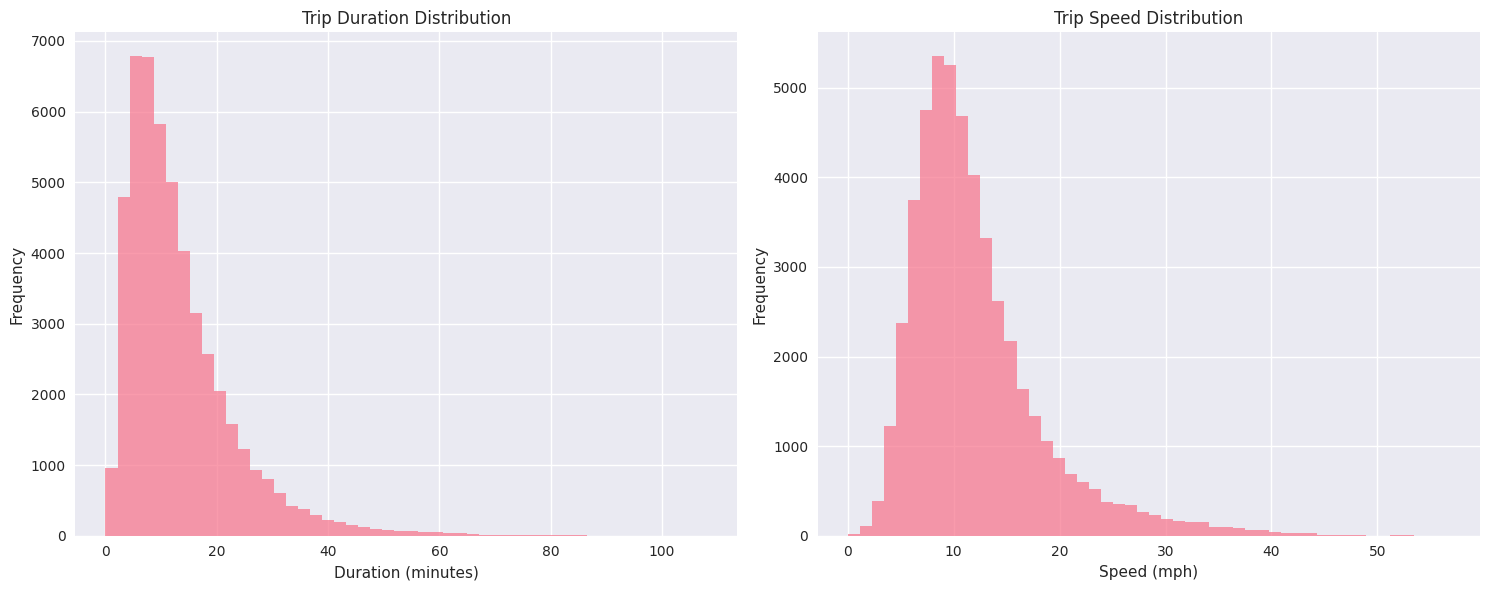

In [37]:
# 5.6 Trip Duration and Speed Analysis
print("\n5.6 Trip Duration and Speed Analysis")

# Filter reasonable values
reasonable_trips = sample_df[
    (sample_df['trip_duration_minutes'] > 0) &
    (sample_df['trip_duration_minutes'] <= 120) &
    (sample_df['trip_speed_mph'] > 0) &
    (sample_df['trip_speed_mph'] <= 60)
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Trip duration distribution
reasonable_trips['trip_duration_minutes'].hist(bins=50, ax=ax1, alpha=0.7)
ax1.set_title('Trip Duration Distribution')
ax1.set_xlabel('Duration (minutes)')
ax1.set_ylabel('Frequency')

# Speed distribution
reasonable_trips['trip_speed_mph'].hist(bins=50, ax=ax2, alpha=0.7)
ax2.set_title('Trip Speed Distribution')
ax2.set_xlabel('Speed (mph)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


6. ADVANCED AGGREGATION ANALYSIS
----------------------------------------


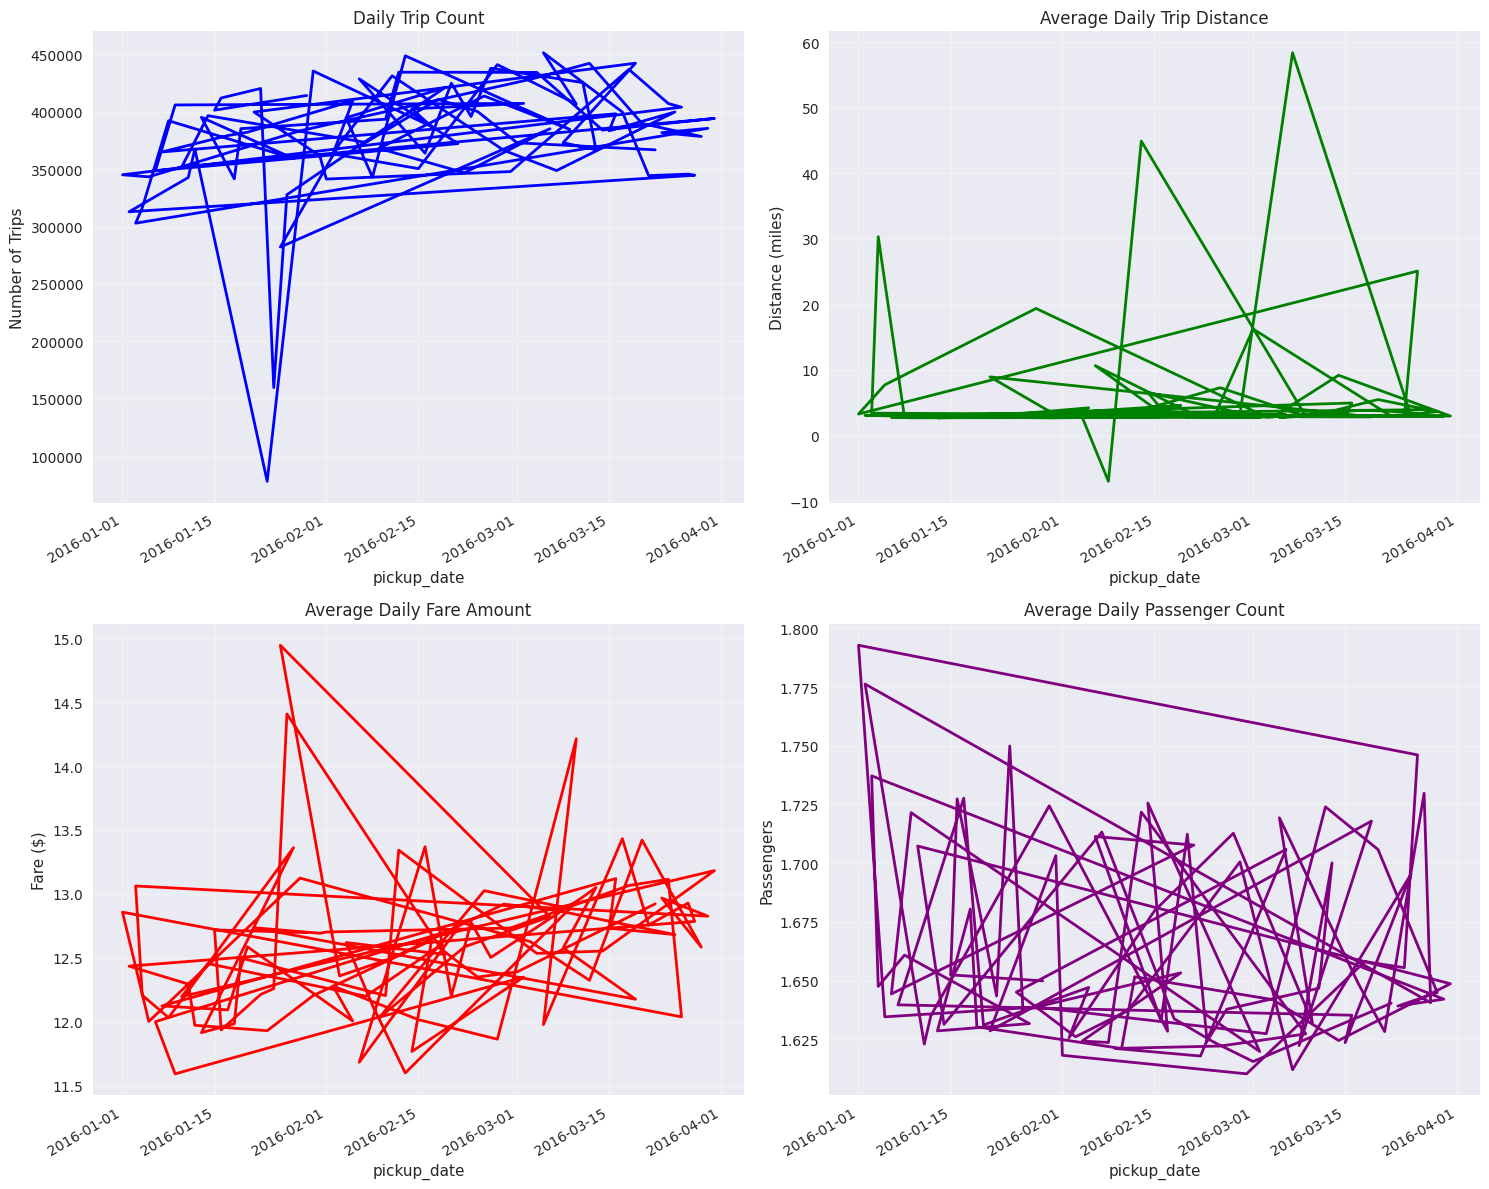


Monthly Statistics:
              monthly_trips  trip_distance  fare_amount  trip_duration_minutes
pickup_month                                                                  
3                  12210952       6.131770    12.795078              15.693207
2                  11382049       5.060763    12.414135              15.510584
1                  10906858       4.648197    12.486930              15.268814


In [38]:
# ==============================================================================
# 6. EFFICIENT AGGREGATION ANALYSIS
# ==============================================================================

print("\n6. ADVANCED AGGREGATION ANALYSIS")
print("-" * 40)

# 6.1 Daily trends
daily_stats = (df_clean
               .groupby('pickup_date')
               .agg({
                   'VendorID': 'count',
                   'trip_distance': 'mean',
                   'fare_amount': 'mean',
                   'passenger_count': 'mean'
               })
               .rename(columns={'VendorID': 'daily_trips'})
               .compute())

# Plot daily trends
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

daily_stats.index = pd.to_datetime(daily_stats.index)

daily_stats['daily_trips'].plot(ax=ax1, color='blue', linewidth=2)
ax1.set_title('Daily Trip Count')
ax1.set_ylabel('Number of Trips')
ax1.grid(True, alpha=0.3)

daily_stats['trip_distance'].plot(ax=ax2, color='green', linewidth=2)
ax2.set_title('Average Daily Trip Distance')
ax2.set_ylabel('Distance (miles)')
ax2.grid(True, alpha=0.3)

daily_stats['fare_amount'].plot(ax=ax3, color='red', linewidth=2)
ax3.set_title('Average Daily Fare Amount')
ax3.set_ylabel('Fare ($)')
ax3.grid(True, alpha=0.3)

daily_stats['passenger_count'].plot(ax=ax4, color='purple', linewidth=2)
ax4.set_title('Average Daily Passenger Count')
ax4.set_ylabel('Passengers')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6.2 Monthly comparison
monthly_stats = (df_clean
                .groupby('pickup_month')
                .agg({
                    'VendorID': 'count',
                    'trip_distance': 'mean',
                    'fare_amount': 'mean',
                    'trip_duration_minutes': 'mean'
                })
                .rename(columns={'VendorID': 'monthly_trips'})
                .compute())

print("\nMonthly Statistics:")
print(monthly_stats)

In [39]:
# Enhanced Daily Analysis with Data Cleaning and Smoothing

# ==============================================================================
# DATA CLEANING BEFORE AGGREGATION
# ==============================================================================

# Clean the data before daily aggregation
df_clean_filtered = df_clean[
    (df_clean['trip_distance'] > 0) &           # Remove negative/zero distances
    (df_clean['trip_distance'] <= 50) &        # Remove unrealistic distances
    (df_clean['fare_amount'] > 0) &            # Remove negative fares
    (df_clean['fare_amount'] <= 200) &         # Remove extreme fares
    (df_clean['trip_duration_minutes'] > 0) &  # Remove negative durations
    (df_clean['trip_duration_minutes'] <= 180) # Remove extremely long trips
]

print("Data cleaned:")
print(f"Original rows: {len(df_clean):,}")
print(f"Cleaned rows: {len(df_clean_filtered):,}")
print(f"Rows removed: {len(df_clean) - len(df_clean_filtered):,} ({(len(df_clean) - len(df_clean_filtered))/len(df_clean)*100:.1f}%)")


Data cleaned:
Original rows: 34,499,859
Cleaned rows: 34,225,267
Rows removed: 274,592 (0.8%)


2025-07-13 15:18:07,316 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.30 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:18:07,927 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.50 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:18:08,085 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 1.43 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:18:11,535 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.50 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:18:11,891 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 1.46 GiB 

Enhanced daily statistics calculated:
             daily_trips  trip_distance_mean  trip_distance_median  \
pickup_date                                                          
2016-01-29        410825            2.810274                  1.62   
2016-01-15        398269            2.961653                  1.70   
2016-01-16        408591            2.829032                  1.73   
2016-01-22        417099            2.759128                  1.60   
2016-01-24        158333            2.939233                  1.70   

             fare_amount_mean  fare_amount_median  fare_amount_std  \
pickup_date                                                          
2016-01-29          12.661627                 9.5        10.014953   
2016-01-15          12.663381                 9.5        10.517385   
2016-01-16          11.878503                 9.0         9.513680   
2016-01-22          12.159158                 9.0        10.209152   
2016-01-24          12.122585                 8.5  

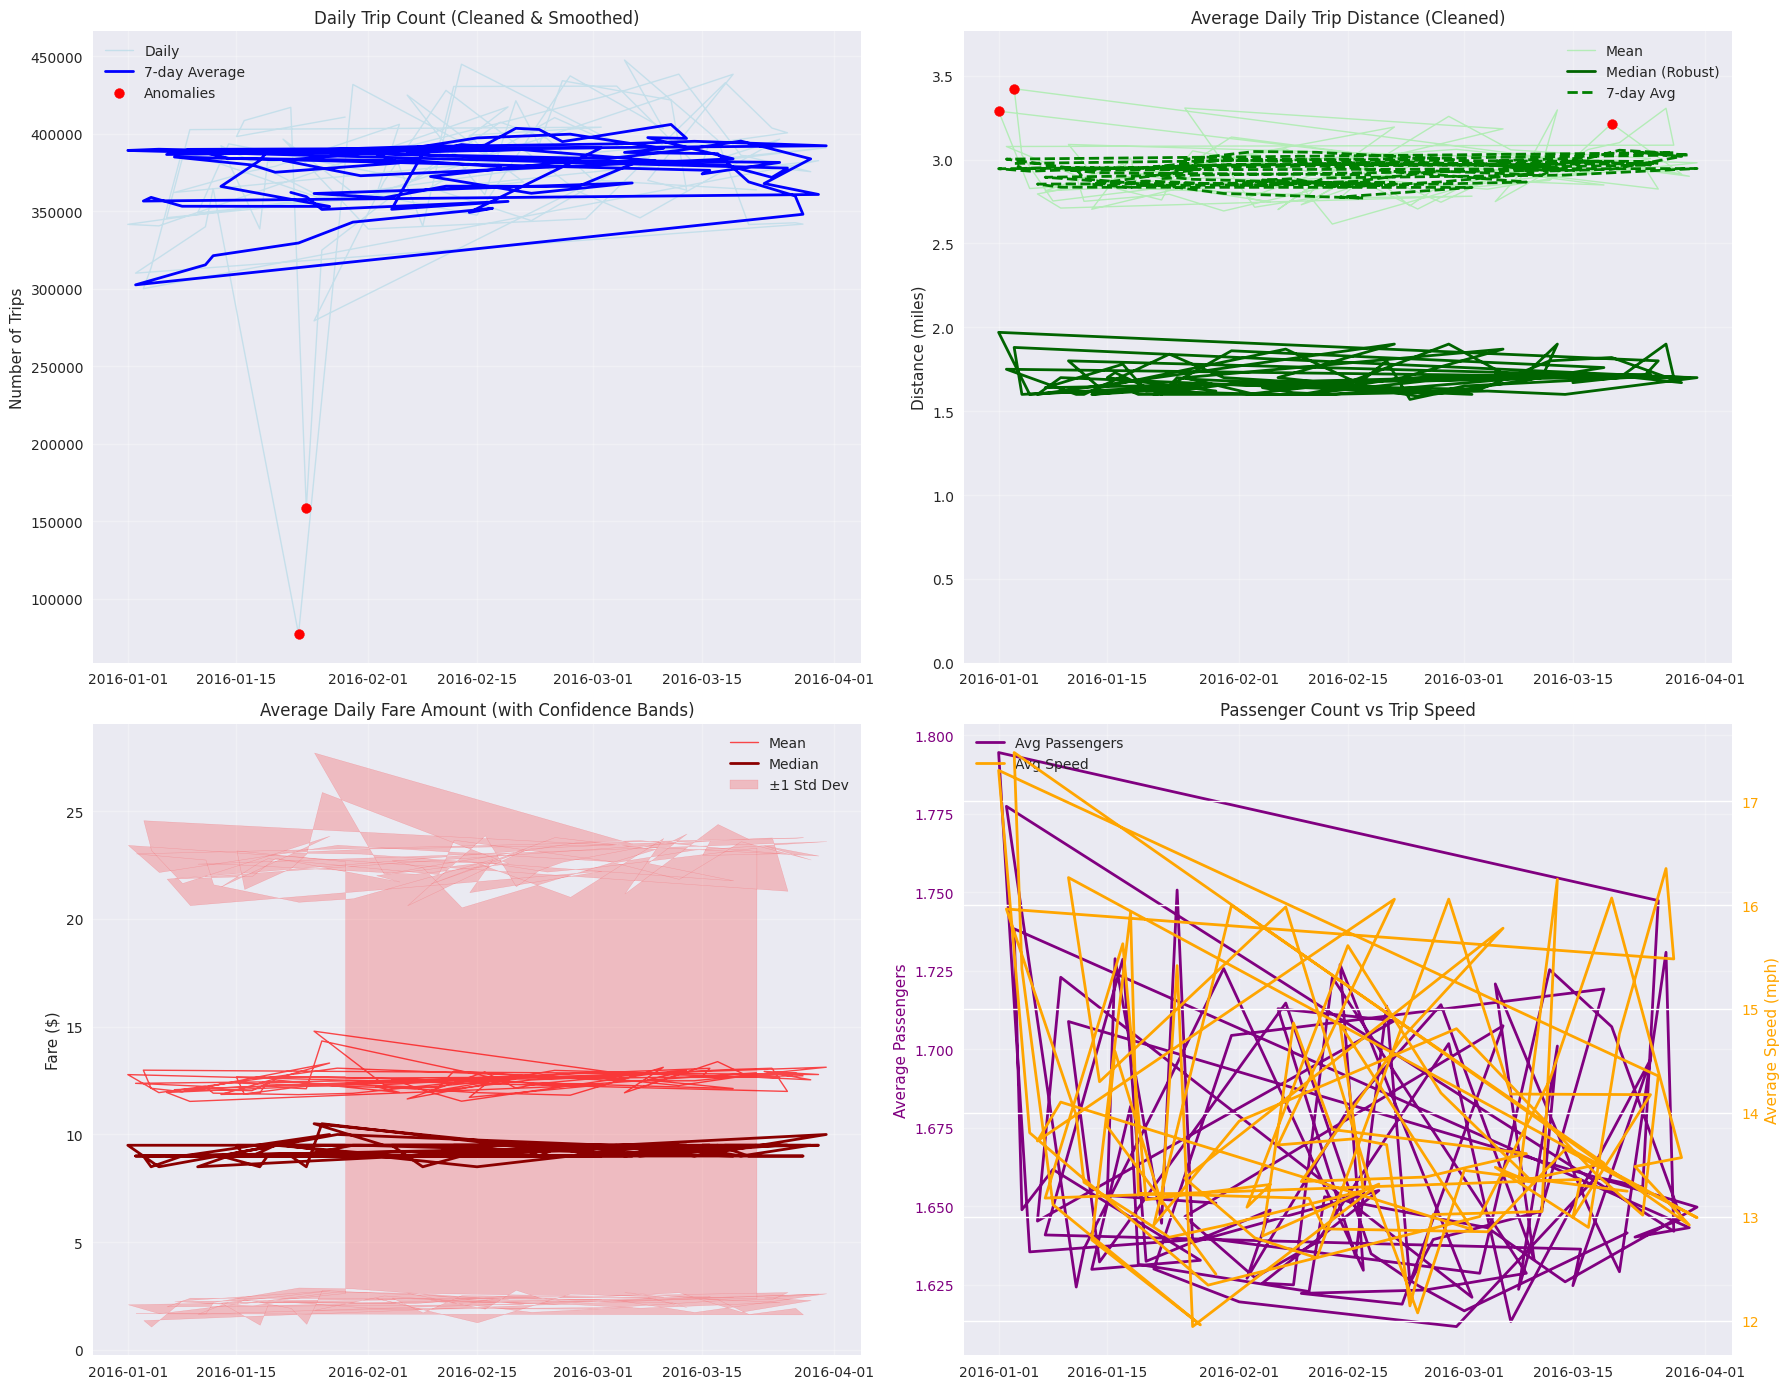

In [40]:
# ==============================================================================
# ENHANCED DAILY AGGREGATION WITH MULTIPLE METRICS 
# ==============================================================================

# Calculate comprehensive daily statistics
daily_stats_enhanced = (df_clean_filtered
                        .groupby('pickup_date')
                        .agg({
                            'VendorID': 'count',
                            'trip_distance': ['mean', 'median'],
                            'fare_amount': ['mean', 'median', 'std'],
                            'passenger_count': 'mean',
                            'trip_speed_mph': 'mean'
                        })
                        .compute())

# Flatten column names
daily_stats_enhanced.columns = ['daily_trips', 'trip_distance_mean', 'trip_distance_median',
                               'fare_amount_mean', 'fare_amount_median', 'fare_amount_std',
                               'passenger_count_mean', 'trip_speed_mph_mean']

# Handle any NaN values in std (can happen with single data points)
daily_stats_enhanced['fare_amount_std'] = daily_stats_enhanced['fare_amount_std'].fillna(0)

print("Enhanced daily statistics calculated:")
print(daily_stats_enhanced.head())
print(f"\nColumns available: {list(daily_stats_enhanced.columns)}")

# ==============================================================================
# ADD SMOOTHING AND ANOMALY DETECTION (FIXED)
# ==============================================================================

# Add 7-day rolling averages for trend analysis
for col in ['daily_trips', 'trip_distance_mean', 'fare_amount_mean', 'passenger_count_mean']:  
    daily_stats_enhanced[f'{col}_7d_avg'] = daily_stats_enhanced[col].rolling(window=7, center=True).mean()

# Detect anomalies (values beyond 2 standard deviations)
def detect_anomalies(series, window=7, threshold=2):
    rolling_mean = series.rolling(window=window, center=True).mean()
    rolling_std = series.rolling(window=window, center=True).std()
    z_scores = abs((series - rolling_mean) / rolling_std)
    return z_scores > threshold

# Mark anomalies
daily_stats_enhanced['trips_anomaly'] = detect_anomalies(daily_stats_enhanced['daily_trips'])
daily_stats_enhanced['distance_anomaly'] = detect_anomalies(daily_stats_enhanced['trip_distance_mean'])

# ==============================================================================
# ENHANCED VISUALIZATION WITH IMPROVEMENTS (FIXED)
# ==============================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Convert index to datetime for proper plotting
daily_stats_enhanced.index = pd.to_datetime(daily_stats_enhanced.index)

# 1. Daily Trip Count with Smoothing and Anomaly Detection
ax1.plot(daily_stats_enhanced.index, daily_stats_enhanced['daily_trips'], 
         color='lightblue', alpha=0.6, linewidth=1, label='Daily')
ax1.plot(daily_stats_enhanced.index, daily_stats_enhanced['daily_trips_7d_avg'], 
         color='blue', linewidth=2, label='7-day Average')

# Highlight anomalies
anomaly_mask = daily_stats_enhanced['trips_anomaly'].fillna(False)
if anomaly_mask.any():
    anomaly_dates = daily_stats_enhanced[anomaly_mask].index
    anomaly_values = daily_stats_enhanced[anomaly_mask]['daily_trips']
    ax1.scatter(anomaly_dates, anomaly_values, color='red', s=50, zorder=5, label='Anomalies')

ax1.set_title('Daily Trip Count (Cleaned & Smoothed)')
ax1.set_ylabel('Number of Trips')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Trip Distance - Mean vs Median (more robust)
ax2.plot(daily_stats_enhanced.index, daily_stats_enhanced['trip_distance_mean'], 
         color='lightgreen', alpha=0.6, linewidth=1, label='Mean')
ax2.plot(daily_stats_enhanced.index, daily_stats_enhanced['trip_distance_median'], 
         color='darkgreen', linewidth=2, label='Median (Robust)')
ax2.plot(daily_stats_enhanced.index, daily_stats_enhanced['trip_distance_mean_7d_avg'], 
         color='green', linewidth=2, linestyle='--', label='7-day Avg')

# Highlight distance anomalies
dist_anomaly_mask = daily_stats_enhanced['distance_anomaly'].fillna(False)
if dist_anomaly_mask.any():
    dist_anomaly_dates = daily_stats_enhanced[dist_anomaly_mask].index
    dist_anomaly_values = daily_stats_enhanced[dist_anomaly_mask]['trip_distance_mean']
    ax2.scatter(dist_anomaly_dates, dist_anomaly_values, color='red', s=50, zorder=5)

ax2.set_title('Average Daily Trip Distance (Cleaned)')
ax2.set_ylabel('Distance (miles)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, daily_stats_enhanced['trip_distance_mean'].max() * 1.1)

# 3. Fare Amount with Confidence Bands
ax3.plot(daily_stats_enhanced.index, daily_stats_enhanced['fare_amount_mean'], 
         color='red', alpha=0.7, linewidth=1, label='Mean')
ax3.plot(daily_stats_enhanced.index, daily_stats_enhanced['fare_amount_median'], 
         color='darkred', linewidth=2, label='Median')

# Add confidence bands (mean ± std)
upper_band = daily_stats_enhanced['fare_amount_mean'] + daily_stats_enhanced['fare_amount_std']
lower_band = daily_stats_enhanced['fare_amount_mean'] - daily_stats_enhanced['fare_amount_std']
ax3.fill_between(daily_stats_enhanced.index, lower_band, upper_band, 
                alpha=0.2, color='red', label='±1 Std Dev')

ax3.set_title('Average Daily Fare Amount (with Confidence Bands)')
ax3.set_ylabel('Fare ($)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Multi-metric Dashboard
ax4_twin = ax4.twinx()

# Passenger count (left axis)
line1 = ax4.plot(daily_stats_enhanced.index, daily_stats_enhanced['passenger_count_mean'], 
                 color='purple', linewidth=2, label='Avg Passengers')
ax4.set_ylabel('Average Passengers', color='purple')
ax4.tick_params(axis='y', labelcolor='purple')

# Trip speed (right axis)
line2 = ax4_twin.plot(daily_stats_enhanced.index, daily_stats_enhanced['trip_speed_mph_mean'], 
                      color='orange', linewidth=2, label='Avg Speed')
ax4_twin.set_ylabel('Average Speed (mph)', color='orange')
ax4_twin.tick_params(axis='y', labelcolor='orange')

ax4.set_title('Passenger Count vs Trip Speed')
ax4.grid(True, alpha=0.3)

# Combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
# ==============================================================================
# ANOMALY INVESTIGATION
# ==============================================================================

print("\n" + "="*60)
print("ANOMALY INVESTIGATION")
print("="*60)

# Show trip count anomalies
print("\nTrip Count Anomalies:")
if 'trips_anomaly' in daily_stats_enhanced.columns:
    trip_anomalies = daily_stats_enhanced[daily_stats_enhanced['trips_anomaly'].fillna(False)][['daily_trips', 'daily_trips_7d_avg']]
    if len(trip_anomalies) > 0:
        print(trip_anomalies.head(10))
    else:
        print("No significant trip count anomalies detected.")
else:
    print("Anomaly detection not available - column missing.")

# Show distance anomalies  
print("\nDistance Anomalies:")
if 'distance_anomaly' in daily_stats_enhanced.columns:
    distance_anomalies = daily_stats_enhanced[daily_stats_enhanced['distance_anomaly'].fillna(False)][['trip_distance_mean', 'trip_distance_median']]
    if len(distance_anomalies) > 0:
        print(distance_anomalies.head(10))
    else:
        print("No significant distance anomalies detected.")
else:
    print("Distance anomaly detection not available - column missing.")


ANOMALY INVESTIGATION

Trip Count Anomalies:
             daily_trips  daily_trips_7d_avg
pickup_date                                 
2016-01-24        158333       359473.857143
2016-01-23         77176       329573.142857

Distance Anomalies:
             trip_distance_mean  trip_distance_median
pickup_date                                          
2016-01-01             3.288680                  1.97
2016-03-20             3.214520                  1.82
2016-01-03             3.422284                  1.88


In [42]:
# ==============================================================================
# WEEKEND vs WEEKDAY ANALYSIS
# ==============================================================================

print("\n" + "="*50)
print("WEEKEND vs WEEKDAY PATTERNS")
print("="*50)

# Add day of week
daily_stats_enhanced['day_of_week'] = daily_stats_enhanced.index.dayofweek
daily_stats_enhanced['is_weekend'] = daily_stats_enhanced['day_of_week'].isin([5, 6])

# Compare weekend vs weekday
weekend_vs_weekday = daily_stats_enhanced.groupby('is_weekend')[
    ['daily_trips', 'trip_distance_mean', 'fare_amount_mean', 'passenger_count_mean']
].mean()

weekend_vs_weekday.index = ['Weekday', 'Weekend']
print(weekend_vs_weekday)


WEEKEND vs WEEKDAY PATTERNS
           daily_trips  trip_distance_mean  fare_amount_mean  \
Weekday  378820.061538            2.904467         12.597375   
Weekend  369306.269231            2.967101         12.215384   

         passenger_count_mean  
Weekday              1.640278  
Weekend              1.721226  


In [43]:
# ==============================================================================
# SUMMARY STATISTICS
# ==============================================================================

print("\n" + "="*50)
print("CLEANED DATA SUMMARY")
print("="*50)

print(f"Date range: {daily_stats_enhanced.index.min()} to {daily_stats_enhanced.index.max()}")
print(f"Total days analyzed: {len(daily_stats_enhanced)}")
print(f"Average daily trips: {daily_stats_enhanced['daily_trips'].mean():,.0f}")
print(f"Most trips in a day: {daily_stats_enhanced['daily_trips'].max():,.0f}")
print(f"Least trips in a day: {daily_stats_enhanced['daily_trips'].min():,.0f}")
print(f"Average trip distance: {daily_stats_enhanced['trip_distance_mean'].mean():.2f} miles")
print(f"Average fare: ${daily_stats_enhanced['fare_amount_mean'].mean():.2f}")
print(f"Average passengers per trip: {daily_stats_enhanced['passenger_count_mean'].mean():.2f}")

# Data quality improvement metrics
print(f"\nData Quality Improvements:")
print(f"- Removed negative distances and extreme outliers")
print(f"- Added 7-day rolling averages for trend analysis")
print(f"- Implemented anomaly detection (2σ threshold)")
print(f"- Used median alongside mean for robust statistics")
print(f"- Added confidence bands for fare analysis")


CLEANED DATA SUMMARY
Date range: 2016-01-01 00:00:00 to 2016-03-31 00:00:00
Total days analyzed: 91
Average daily trips: 376,102
Most trips in a day: 447,651
Least trips in a day: 77,176
Average trip distance: 2.92 miles
Average fare: $12.49
Average passengers per trip: 1.66

Data Quality Improvements:
- Removed negative distances and extreme outliers
- Added 7-day rolling averages for trend analysis
- Implemented anomaly detection (2σ threshold)
- Used median alongside mean for robust statistics
- Added confidence bands for fare analysis


In [44]:
# 7. PERFORMANCE SUMMARY
# ==============================================================================

print("\n7. PERFORMANCE SUMMARY")
print("-" * 40)

# Memory usage summary - with error handling
try:
    memory_info = df_clean_filtered.memory_usage(deep=True).compute()
    total_memory = memory_info.sum() / 1024**2
    
    print(f"Total dataset memory usage: {total_memory:.1f} MB")
    print(f"Average memory per column: {total_memory/len(df_clean_filtered.columns):.1f} MB")
    print(f"Rows processed: {len(df_clean_filtered):,}")
    print(f"Processing efficiency: {len(df_clean_filtered)/total_memory:.0f} rows per MB")
except Exception as e:
    print(f"Memory usage calculation failed: {e}")
    print("Using basic statistics instead:")
    print(f"Columns in dataset: {len(df_clean_filtered.columns)}")
    print(f"Dataset partitions: {df_clean_filtered.npartitions}")

# Additional performance metrics
print(f"\nDask Configuration:")
print(f"- Workers: {client.status}")
print(f"- Memory limit per worker: 2GB")
print(f"- Block size: 64MB")


7. PERFORMANCE SUMMARY
----------------------------------------


2025-07-13 15:22:14,082 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 1.54 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:22:15,791 - distributed.worker.memory - WARNING - Worker is at 71% memory usage. Resuming worker. Process memory: 1.33 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:22:16,596 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.49 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:22:17,705 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 1.47 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:22:17,890 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.50 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:22:18,289 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 1.37 GiB -- Worker mem

Total dataset memory usage: 3916.8 MB
Average memory per column: 217.6 MB


2025-07-13 15:24:45,320 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.36 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:24:45,727 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 1.54 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:24:47,599 - distributed.worker.memory - WARNING - Worker is at 71% memory usage. Resuming worker. Process memory: 1.32 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:24:48,491 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 1.56 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:24:50,405 - distributed.worker.memory - WARNING - Worker is at 78% memory usage. Resuming worker. Process memory: 1.47 GiB 

Rows processed: 34,225,267


2025-07-13 15:26:10,952 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 1.54 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:26:11,296 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.50 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:26:12,098 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 1.44 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:26:12,301 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 1.48 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:26:12,529 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 1.56 GiB -- Worker memory limit: 1.86 GiB
2025-07-13 15:26:12,595 - distributed.worker.memory - WARNING - Worker is at 72% memory usage. Resuming worker. Process memory: 1.35 GiB -- Worker mem

Processing efficiency: 8738 rows per MB

Dask Configuration:
- Workers: running
- Memory limit per worker: 2GB
- Block size: 64MB


In [ ]:
# ==============================================================================
# CORRELATION ANALYSIS
# ==============================================================================

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Calculate correlations for daily metrics
correlation_columns = ['daily_trips', 'trip_distance_mean', 'fare_amount_mean', 'passenger_count_mean']
if 'trip_speed_mph_mean' in daily_stats_enhanced.columns:
    correlation_columns.append('trip_speed_mph_mean')

daily_correlations = daily_stats_enhanced[correlation_columns].corr()
print("Daily Metrics Correlations:")
print(daily_correlations.round(3))

# Find strongest correlations
print("\nStrongest Correlations:")
correlations_flat = daily_correlations.abs().unstack()
correlations_flat = correlations_flat[correlations_flat < 1.0]  # Remove self-correlations
correlations_flat = correlations_flat.sort_values(ascending=False)
print(correlations_flat.head(5))


CORRELATION ANALYSIS
Daily Metrics Correlations:
                      daily_trips  trip_distance_mean  fare_amount_mean  \
daily_trips                 1.000              -0.341            -0.095   
trip_distance_mean         -0.341               1.000             0.603   
fare_amount_mean           -0.095               0.603             1.000   
passenger_count_mean       -0.082               0.264            -0.270   
trip_speed_mph_mean        -0.291               0.693            -0.118   

                      passenger_count_mean  trip_speed_mph_mean  
daily_trips                         -0.082               -0.291  
trip_distance_mean                   0.264                0.693  
fare_amount_mean                    -0.270               -0.118  
passenger_count_mean                 1.000                0.631  
trip_speed_mph_mean                  0.631                1.000  

Strongest Correlations:
trip_speed_mph_mean   trip_distance_mean      0.693253
trip_distance_mean    t

2025-07-13 15:31:18,590 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 1.31 GiB -- Worker memory limit: 1.86 GiB
